# SUPPORT VECTOR MACHINE

# Task 1: Exploratory Data Analysis (EDA)

Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Step 2: Load the Data

In [2]:
# Load the CSV file
df = pd.read_csv('/Users/reddyharshayadhav/Downloads/Pharma_Industry.csv')
print(df.head())
print(df.info())
print(df.describe())

   Drug Dosage (mg)  Systolic Blood Pressure (mmHg)  Heart Rate (BPM)  \
0         -0.128538                        0.303280         -1.881849   
1         -1.846188                        2.865142         -0.929511   
2         -1.252393                       -1.541613          0.363632   
3          1.992515                       -1.142779         -0.766657   
4          0.377100                        0.538410         -0.029263   

   Liver Toxicity Index (U/L)  Blood Glucose Level (mg/dL)  Drug Response  
0                    0.258286                    -0.792011              1  
1                    2.866786                    -0.719447              1  
2                   -0.325370                     0.191314              0  
3                    0.975286                    -0.823355              1  
4                    1.896015                    -0.960130              1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 

Step 3: Exploratory Data Analysis (EDA)

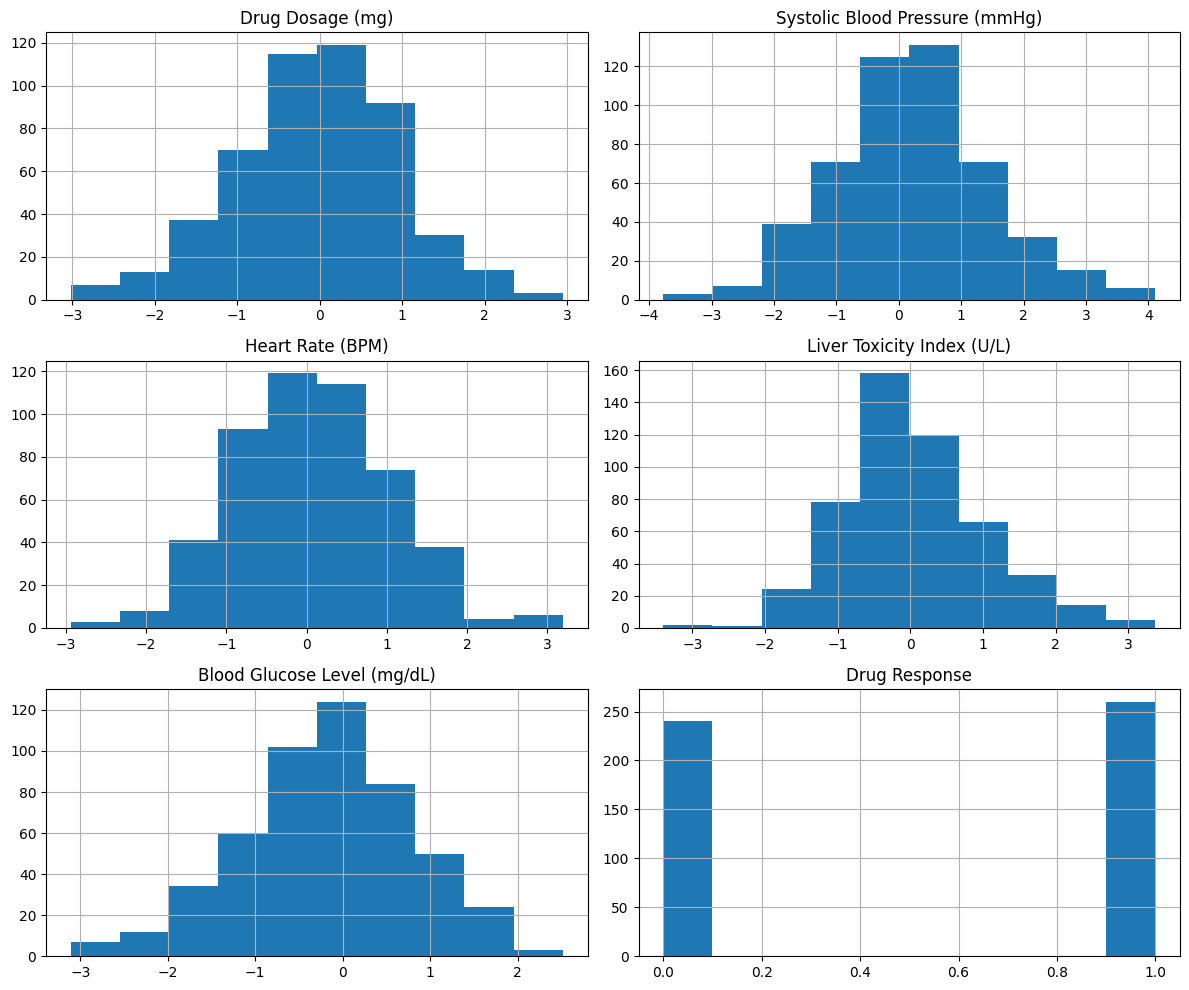

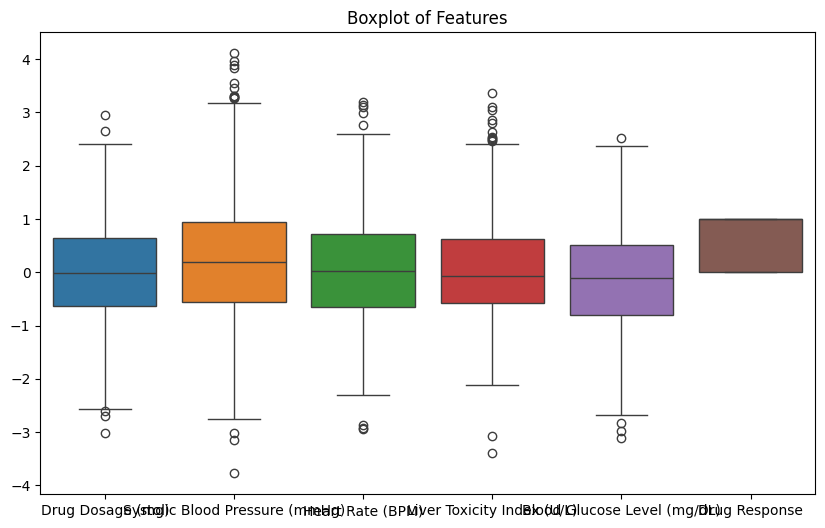

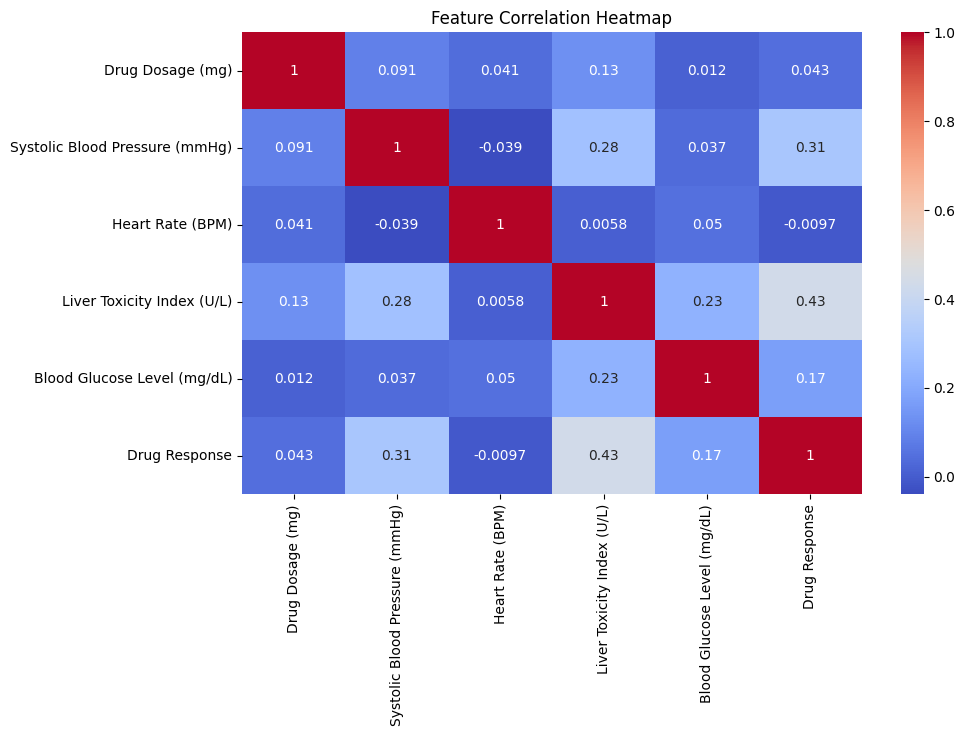

In [3]:
# Histogram for each feature
df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Features')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Task 2: Data Preprocessing

In [4]:
# Check for categorical features and encode if needed
# For this dataset, all columns are numeric except 'Drug Response'

# Separate X and y
X = df.drop('Drug Response', axis=1)
y = df['Drug Response']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Task 3: Data Visualization

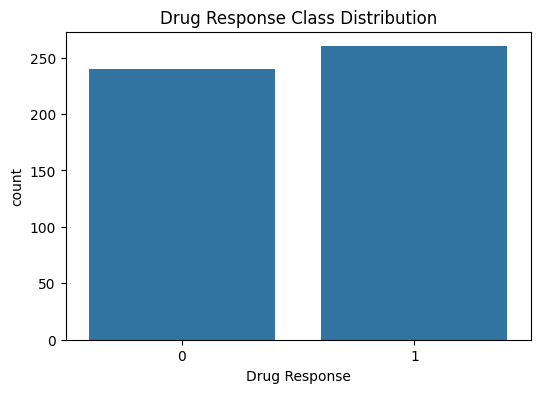

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='Drug Response', data=df)
plt.title('Drug Response Class Distribution')
plt.show()

# Pairplot (for visualization, if needed)
# sns.pairplot(df, hue='Drug Response')

# Task 4: SVM Implementation

In [6]:
# Basic SVM Classifier (linear kernel)
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred = svm_clf.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.77      0.73        48
           1       0.76      0.67      0.71        52

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100

Confusion Matrix:
 [[37 11]
 [17 35]]


# Task 5: Visualization of SVM Results

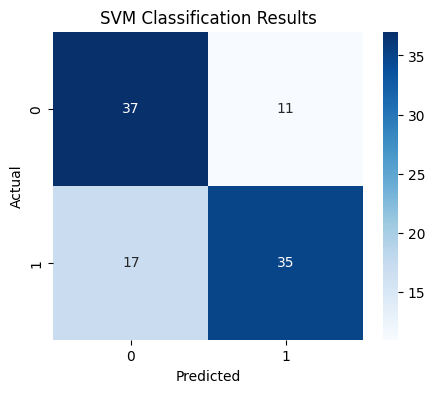

In [7]:
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Classification Results')
plt.show()

# Task 6: Parameter Tuning and Optimization

In [8]:
# Try different SVM kernels and C values
for kernel in ['linear', 'poly', 'rbf']:
    print(f"\nKernel: {kernel}")
    svm_model = SVC(kernel=kernel, random_state=42)
    svm_model.fit(X_train_scaled, y_train)
    y_pred_k = svm_model.predict(X_test_scaled)
    print("Accuracy:", accuracy_score(y_test, y_pred_k))
    print(confusion_matrix(y_test, y_pred_k))


Kernel: linear
Accuracy: 0.72
[[37 11]
 [17 35]]

Kernel: poly
Accuracy: 0.65
[[31 17]
 [18 34]]

Kernel: rbf
Accuracy: 0.77
[[34 14]
 [ 9 43]]


# Task 7: Comparison and Analysis

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('/Users/reddyharshayadhav/Downloads/Pharma_Industry.csv')
y = df['Drug Response']
X = df.drop('Drug Response', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
results = []
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    results.append({
        'Kernel': kernel,
        'Accuracy': round(acc,4),
        'Precision': round(report['weighted avg']['precision'],4),
        'Recall': round(report['weighted avg']['recall'],4),
        'F1-score': round(report['weighted avg']['f1-score'],4),
        'Confusion Matrix': cm.tolist()
    })

results_df = pd.DataFrame(results).drop('Confusion Matrix', axis=1)
display(results_df)

,Kernel,Accuracy,Precision,Recall,F1-score
0,linear,0.72,0.7245,0.72,0.7197
1,poly,0.65,0.6503,0.65,0.6501
2,rbf,0.77,0.7718,0.77,0.7690


In [11]:
for r in results:
    print(f"\n{r['Kernel']} kernel - Confusion Matrix:")
    print(pd.DataFrame(r['Confusion Matrix']))


linear kernel - Confusion Matrix:
    0   1
0  37  11
1  17  35

poly kernel - Confusion Matrix:
    0   1
0  31  17
1  18  34

rbf kernel - Confusion Matrix:
    0   1
0  34  14
1   9  43


**Summary Table of SVM Kernels**

| Kernel | Accuracy | Precision | Recall | F1-score |
|--------|----------|-----------|--------|----------|
| linear | 0.72     | 0.7245    | 0.72   | 0.7197   |
| poly   | 0.65     | 0.6503    | 0.65   | 0.6501   |
| rbf    | 0.77     | 0.7718    | 0.77   | 0.7690   |

---
**Confusion Matrices:**
- linear kernel:  [[37, 11], [17, 35]]
- poly kernel:    [[31, 17], [18, 34]]
- rbf kernel:     [[34, 14], [9, 43]]

---
**Analysis & Interpretation:**
- The RBF kernel achieved the highest accuracy (0.77) and F1-score (0.7690), making it most suitable for this dataset.
- The linear kernel gave moderate accuracy (0.72), suggesting some data was linearly separable but not fully.
- The polynomial kernel scored the lowest and produced the most misclassifications.
- The confusion matrices show the rbf kernel was particularly good at predicting the positive class correctly.
---
**Strengths & Weaknesses:**
- SVM models are strong with the right kernel—RBF worked best here.
- SVMs may perform poorly with a wrong kernel or with class imbalance.
---
**Practical Implications:**
- For drug response classification, SVM with RBF kernel is most effective here.
- Kernel choice and parameter tuning are critical.